In [9]:
#read CSV file using pandas
import pandas as pd
import os
df = pd.read_csv('ecommerce_customer_data_large.csv')
#display the first 5 rows of the dataframe
print(df.head())

# Quick look at the data
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicates




   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  

In [10]:
#df.drop(columns=['Age'], inplace=True)  # or 'Customer Age'
# Rename columns for consistency
df.rename(columns={'Customer ID': 'customer_id', 'Product Category': 'product_category', 'Payment Method': 'payment_method',
                   'Purchase Date': 'purchase_date'}, inplace=True)

In [15]:
# Convert 'purchase_date' to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Drop rows with missing important fields
df.dropna(subset=['customer_id', 'product_category', 'payment_method'], inplace=True)

# Fill missing optional fields
df['product_category'] = df['product_category'].fillna('unknown')
df['payment_method'] = df['payment_method'].fillna('unknown')
# Drop duplicates
df.drop_duplicates(inplace=True)

# Quick check
print(df.info())
print(df.head())
print(df.columns.tolist())
print(df.describe(include='all'))
print(df['payment_method'].value_counts())  # Check event type distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   customer_id            250000 non-null  int64         
 1   purchase_date          250000 non-null  datetime64[ns]
 2   product_category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   payment_method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [12]:
print(df.describe())  # Summary statistics

         customer_id  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Churn  
count  250000.000000  202618.000000  250000.000000  250000.00000  
mean       43.798276       0.500824      43.798276       0.20052  
std        15.364915       0.500001      15.364915       0.40039  
min        18.000000       0.000000   

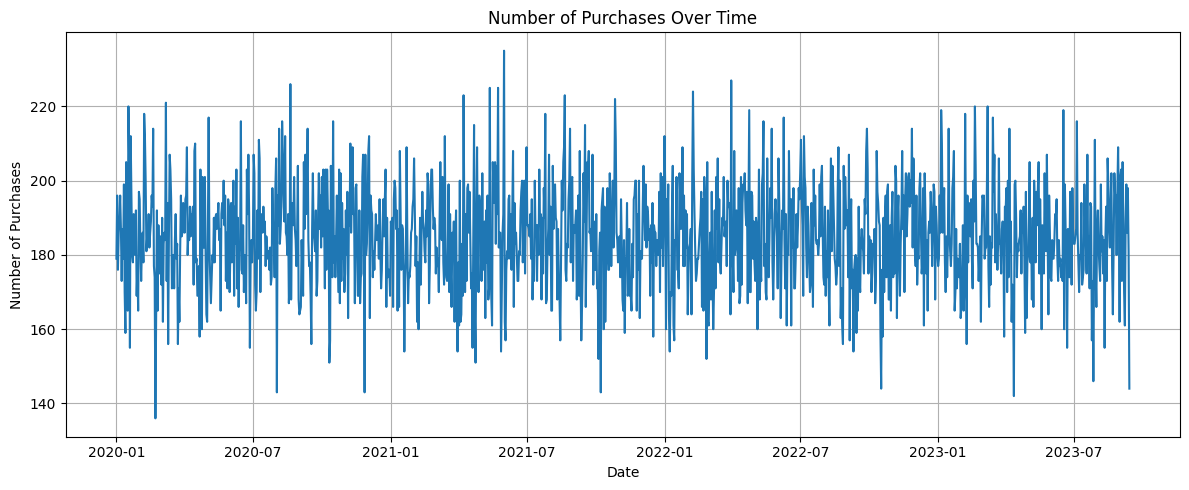

Number of unique product categories: 4


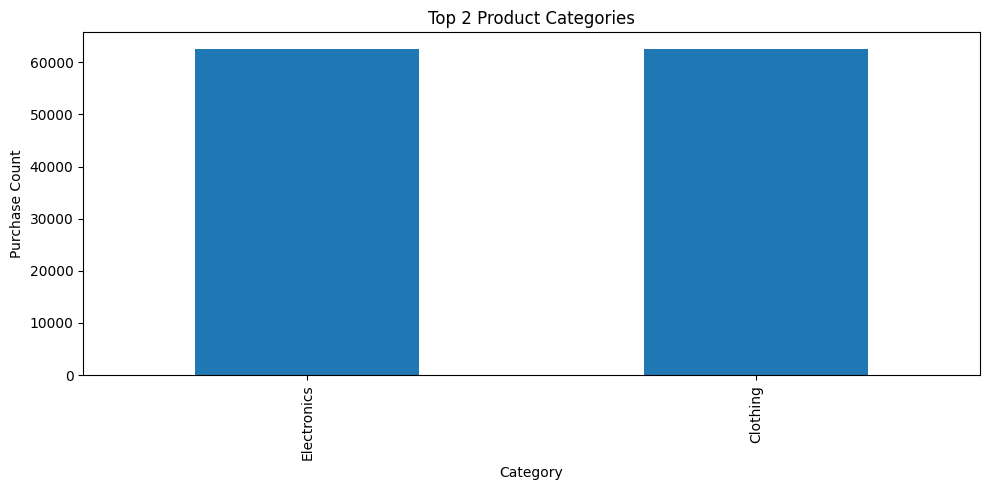

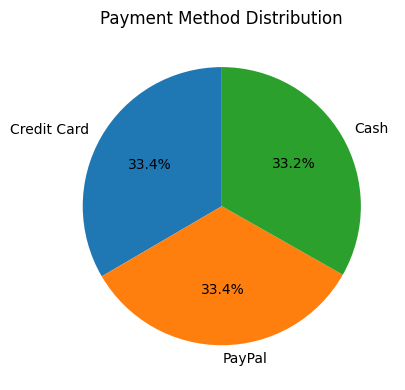

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Purchases over time
df['purchase_date_only'] = df['purchase_date'].dt.date
daily_sales = df.groupby('purchase_date_only').size()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Number of Purchases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()
#how many productsncategories are there?
print("Number of unique product categories:", df['product_category'].nunique())
# Top product categories
plt.figure(figsize=(10,5))
df['product_category'].value_counts().head(2).plot(kind='bar')
plt.title("Top 2 Product Categories")
plt.xlabel("Category")
plt.ylabel("Purchase Count")
plt.tight_layout()
plt.show()

# Payment methods
plt.figure(figsize=(6,4))
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()
# Save cleaned data to a new CSV file 
df.to_csv('cleaned_ecommerce_data.csv', index=False) 

In [ ]:
#discription of product category
print(df['product_category'].describe())  # Summary statistics

count          250000
unique              4
top       Electronics
freq            62630
Name: product_category, dtype: object


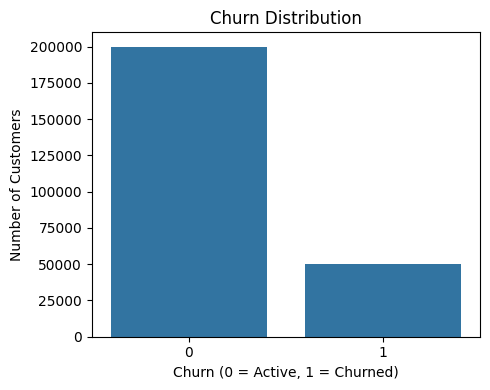

In [ ]:
#Churn Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Active, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


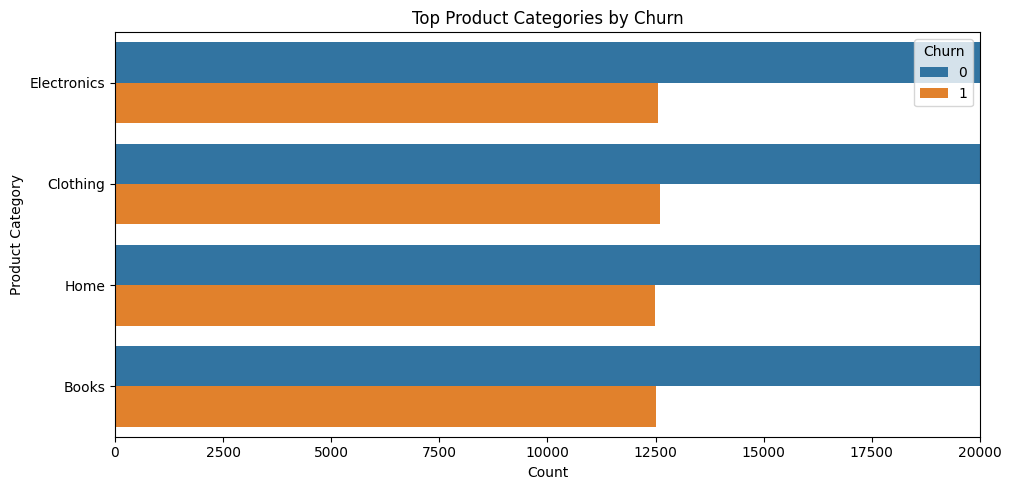

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='product_category', hue='Churn', data=df, order=df['product_category'].value_counts().index[:4])
plt.title("Top Product Categories by Churn")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.tight_layout()
plt.xlim(0, 20000)
plt.show()


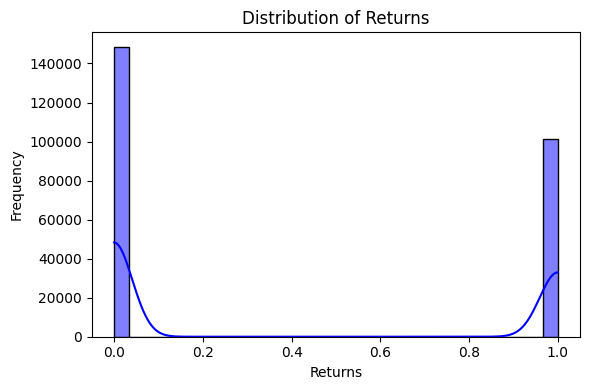

In [ ]:
# Returns: Fill NaN with 0 if it means "no return"
df['returns_filled'] = df['Returns'].fillna(0)

# How many returns vs no returns
plt.figure(figsize=(6,4))
sns.histplot(df['returns_filled'], bins=30, kde=True, color='blue')
plt.title("Distribution of Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


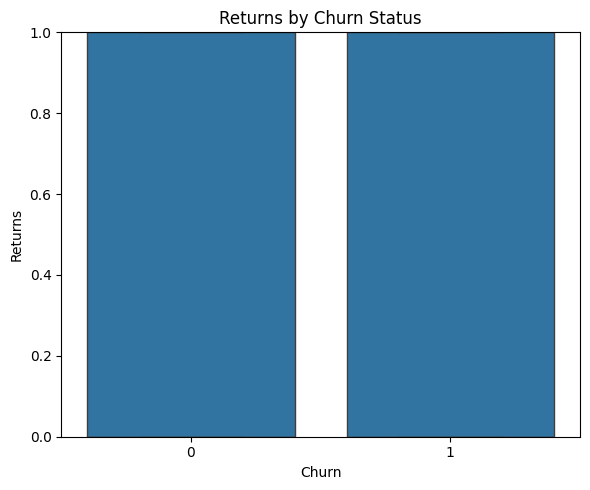

In [ ]:
#Churn vs Returns:
plt.figure(figsize=(6,5))
sns.boxplot(x='Churn', y='returns_filled', data=df)
plt.title("Returns by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Returns")
plt.tight_layout()
plt.ylim(0,1)  # Adjust y-axis limits for better visibility
plt.show()


In [ ]:
#df.rename(columns={'Customer ID': 'customer_id', 'Product Category': 'product_category', 'Payment Method': 'payment_method',
                  # 'Purchase Date': 'purchase_date'}, inplace=True)

In [13]:
#Clean + Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

# Encode Gender
df['Gender'] = df['Gender'].fillna('Unknown')
df['Gender_encoded'] = LabelEncoder().fit_transform(df['Gender'])

# Encode Payment Method
df['Payment Method'] = df['payment_method'].fillna('Unknown')
df['Payment_encoded'] = LabelEncoder().fit_transform(df['Payment Method'])

# Encode Product Category
df['Product Category'] = df['product_category'].fillna('Unknown')
df['Category_encoded'] = LabelEncoder().fit_transform(df['product_category'])


In [16]:
#Extract Time Features from Purchase Date
# Extract date components
df['purchase_month'] = df['purchase_date'].dt.month
df['purchase_day'] = df['purchase_date'].dt.day
df['purchase_weekday'] = df['purchase_date'].dt.weekday
df['purchase_hour'] = df['purchase_date'].dt.hour


In [17]:
# Feature Scaling (for numerical features)
# Return Flag (binary)
df['has_returned'] = df['Returns'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Total amount per product
df['price_per_unit'] = df['Total Purchase Amount'] / df['Quantity']

# Age Group (optional — can also bin into ranges if you want)
df['Age_Group'] = pd.cut(df['Customer Age'], bins=[0, 20, 35, 50, 65, 100], 
                         labels=['Teen', 'Young Adult', 'Adult', 'Mature', 'Senior'])
df['AgeGroup_encoded'] = LabelEncoder().fit_transform(df['Age_Group'].astype(str))


In [18]:
from sklearn.preprocessing import StandardScaler

# Choose numeric features to scale
num_features = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'price_per_unit']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [19]:
features = [
    'Gender_encoded', 'Payment_encoded', 'Category_encoded',
    'purchase_month', 'purchase_day', 'purchase_weekday', 'purchase_hour',
    'has_returned', 'price_per_unit', 'Customer Age', 'AgeGroup_encoded'
]
target = 'Churn'


In [20]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
#Baseline Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.79948
[[39974     0]
 [10026     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     39974
           1       0.00      0.00      0.00     10026

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000



c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Save the model using joblib



Accuracy: 0.5013
[[20103 19871]
 [ 5064  4962]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62     39974
           1       0.20      0.49      0.28     10026

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.45     50000
weighted avg       0.68      0.50      0.55     50000



In [ ]:
!pip install imbalanced-learn


In [23]:
from imblearn.over_sampling import SMOTE

# Assume X_train and y_train are your training features and labels
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Save the model using joblib

Before SMOTE: Counter({0: 159896, 1: 40104})
After SMOTE: Counter({0: 159896, 1: 159896})
Accuracy: 0.5013
[[20103 19871]
 [ 5064  4962]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62     39974
           1       0.20      0.49      0.28     10026

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.45     50000
weighted avg       0.68      0.50      0.55     50000



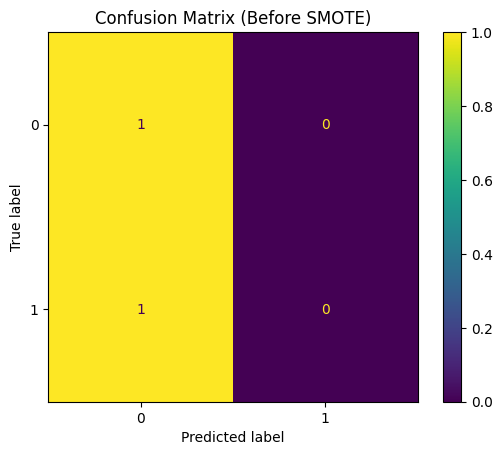

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Original model (no SMOTE)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.title("Confusion Matrix (Before SMOTE)")
plt.show()


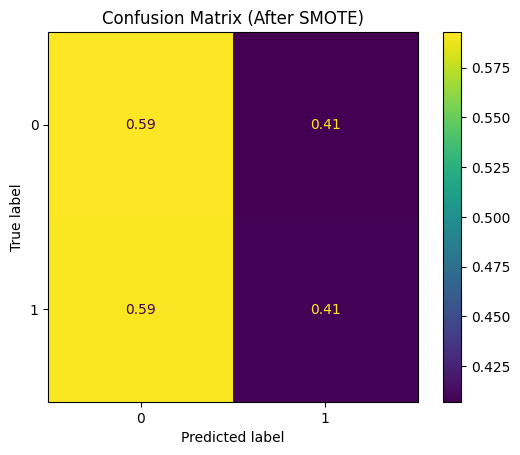

In [25]:
# SMOTE-applied model
lr_model_smote = LogisticRegression(max_iter=1000)
lr_model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = lr_model_smote.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, normalize='true')
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


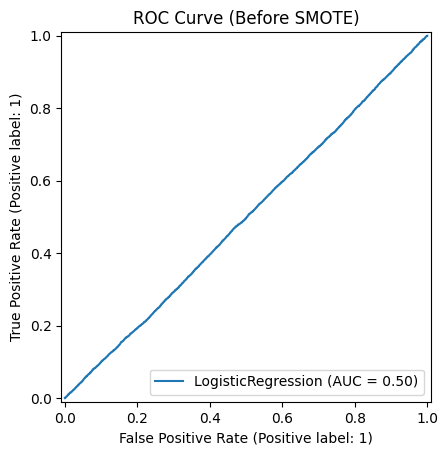

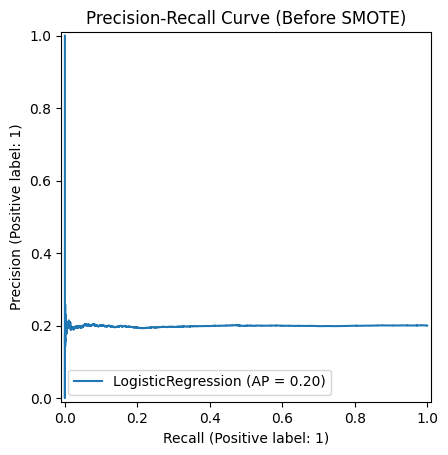

In [26]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("ROC Curve (Before SMOTE)")
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Precision-Recall Curve (Before SMOTE)")
plt.show()


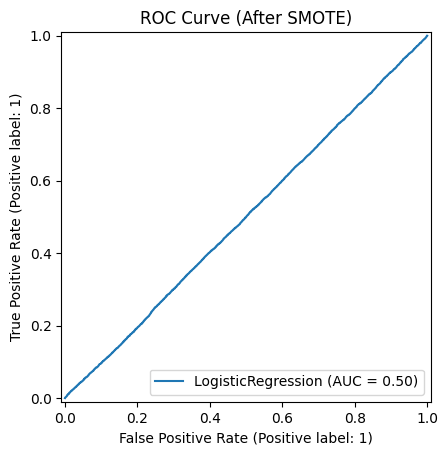

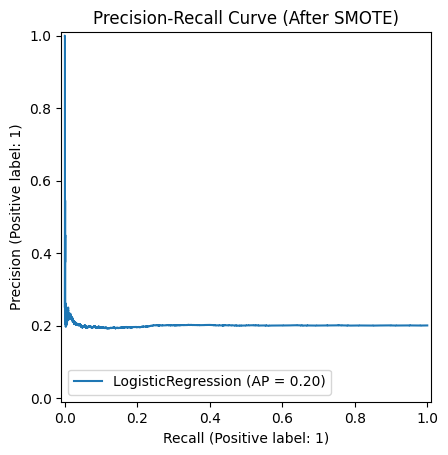

In [27]:
# ROC Curve
RocCurveDisplay.from_estimator(lr_model_smote, X_test, y_test)
plt.title("ROC Curve (After SMOTE)")
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr_model_smote, X_test, y_test)
plt.title("Precision-Recall Curve (After SMOTE)")
plt.show()


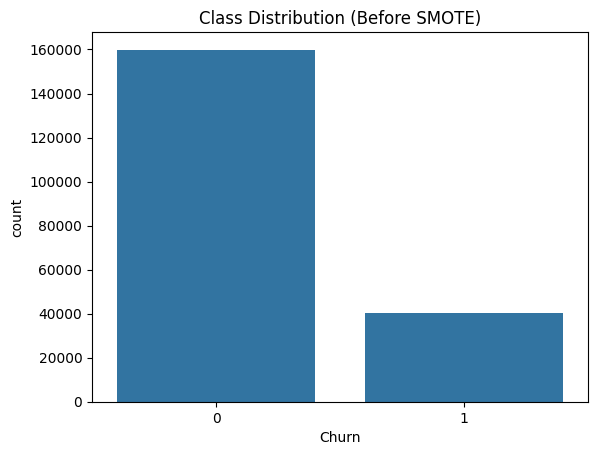

In [28]:
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Class Distribution (Before SMOTE)")
plt.show()


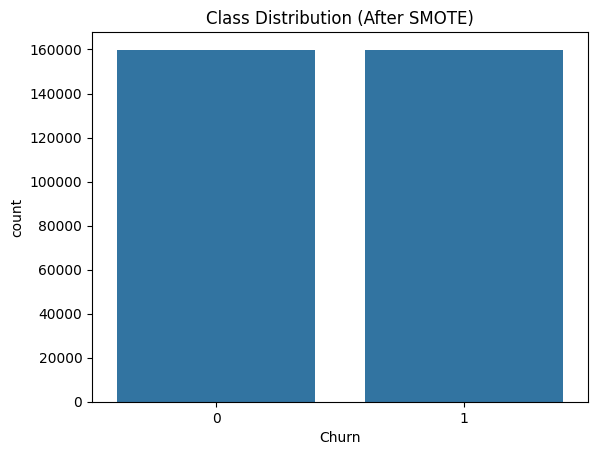

In [29]:
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution (After SMOTE)")
plt.show()


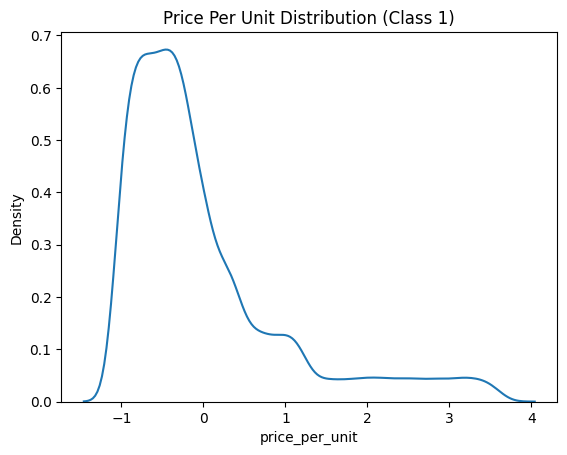

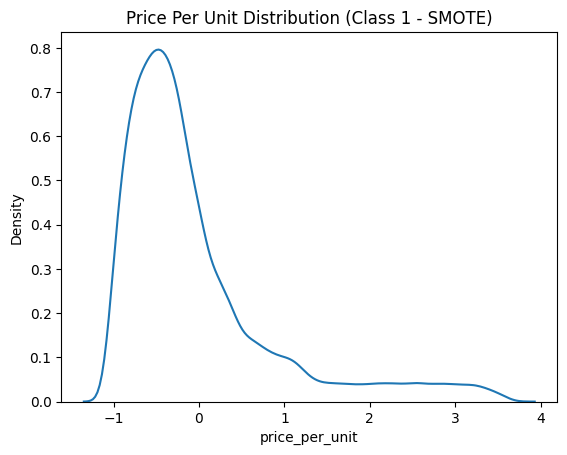

In [30]:
# Before SMOTE
sns.kdeplot(data=X_train[y_train == 1]['price_per_unit'], label='Original')
plt.title("Price Per Unit Distribution (Class 1)")
plt.show()

# After SMOTE
sns.kdeplot(data=X_train_resampled[y_train_resampled == 1]['price_per_unit'], label='SMOTE')
plt.title("Price Per Unit Distribution (Class 1 - SMOTE)")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    class_weight='balanced',  # Adjusts weights to handle class imbalance
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.69798
[[33123  6851]
 [ 8250  1776]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     39974
           1       0.21      0.18      0.19     10026

    accuracy                           0.70     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.68      0.70      0.69     50000



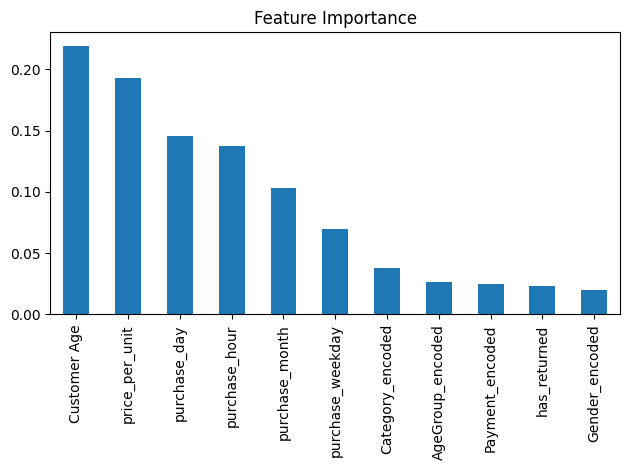

In [32]:
import pandas as pd

# Get feature importances
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot
feature_importances.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()


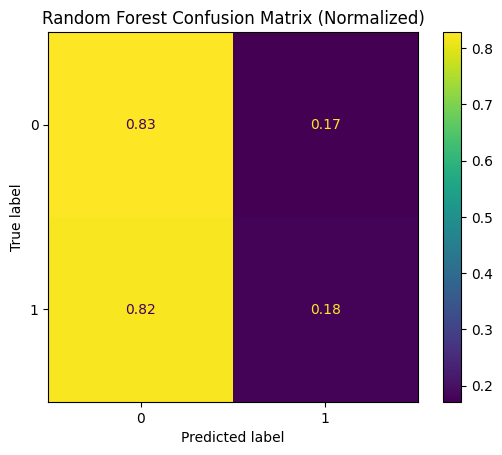

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, normalize='true')
plt.title("Random Forest Confusion Matrix (Normalized)")
plt.show()


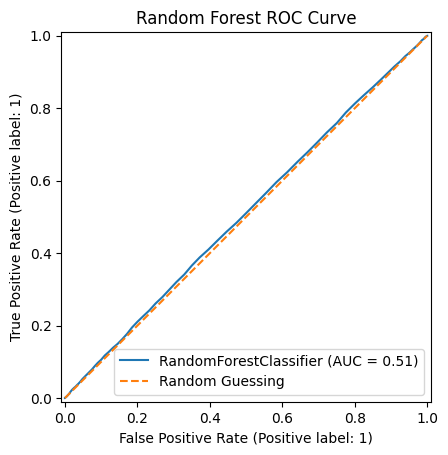

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Reference line
plt.legend()
plt.show()


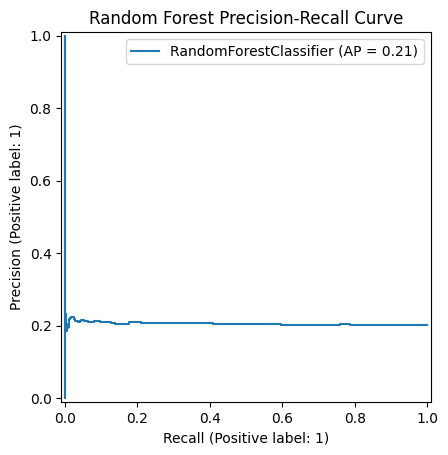

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Precision-Recall Curve")
plt.legend()
plt.show()
